In [ ]:
## import libraries
## read the dataset
## preprocess the dataset
## split the dataset
## develop a model
## evaluate the model
## predict on a new dataset

In [ ]:
## Data gathering
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-06-11 04:00:32--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-06-11 04:00:32--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7ba9912e411b9a13846fb6b5ca.dl.dropboxusercontent.com/cd/0/inline/B9zsWrdhcu_3a-QDn3nkW2_DqOK3Tg-MaqTpPKwUdd30EcB6Pn1ZRHeYPU2MnxBdOCRVMOfj1XaZ9YJ_aTf1J5VeocsN8K_DYe_dyUO5cZNkJN2Uo8OQy2rJRWUdWBCpEwgVQhPHBhn8Yj2nE43wu_a9Tv5dtlyYFiR4dQlP6CeFQA/file# [following]
--2023-06-11 04:00:33--  https://uc7ba9912e411b9a13846fb6b5ca.dl.dropboxusercontent.com/cd/0/inline/B9zsWrdhcu_3a-QDn3nkW2_DqOK3Tg-MaqTpPKwUdd30EcB6Pn1ZRHeYPU2MnxBdO

In [ ]:
### zip file, what is done after that?
!unzip /content/training_set.zip
!unzip /content/test_set.zip

Populating the interactive namespace from numpy and matplotlib


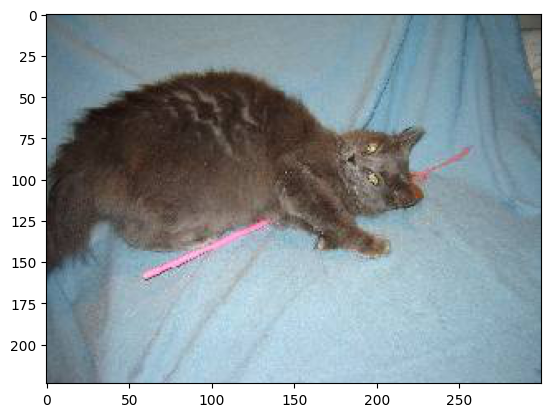

In [ ]:
## print the images inline in jupyter notebook
%pylab inline 
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # image proecessing, reading the images
img = mpimg.imread('/content/test_set/test_set/cats/cat.4016.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# /content/test_set/test_set/dogs/dog.4008.jpg
## print the images inline in jupyter notebook
%pylab inline 
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # image proecessing, reading the images
img = mpimg.imread('/content/test_set/test_set/dogs/dog.4008.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
## Preprocessing steps
## Images are of different sizes - resize images
## cut the image to have the focus on the cat only

In [ ]:
## import libraries and process the data
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# preprocessing: resize the image, zoom the images
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D,Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image

In [ ]:
## Initialize parameters
img_width, img_height = 150,150
train_data_dir = "/content/training_set/training_set"
validation_data_dir = "/content/test_set/test_set"
nb_train_samples = 100 # batch size while training the algorithm
nb_validaiton_samples =  100
epochs = 20
batch_size = 32 # data preprocessing 

In [ ]:
# wxhx3 [channels- RGB values - RGB and BGR[PYTORCH], 3Xwxh]
import tensorflow.keras.backend as k
#150x150x3 [image width, img_height, channels]
#3x150x150 [channels, image width, img_height]
if k.image_data_format() == 'channels_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

In [ ]:
# image
# 28,28,3
# 3,28,28
# 3- img_width
# 28: img_height
# 28: channels

In [ ]:
help(ImageDataGenerator)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, # rescale: normalize the data to a scale of 0 to 1
                                   shear_range= 0.05, #tilting the image
                                   zoom_range =0.15, # zoom the image by 20#
                                   horizontal_flip=True) # x-axis
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  zoom_range=0.2,
                                  shear_range= 0.05)
### fit function on the data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_width, img_height),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    classes =['cats','dogs'])
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                    target_size = (img_width, img_height),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    classes =['cats','dogs']
                                                   )
# why didn't we put classes in the validation part?
# 80 20, many classes, 18 classes, 1-2 classes - validation

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


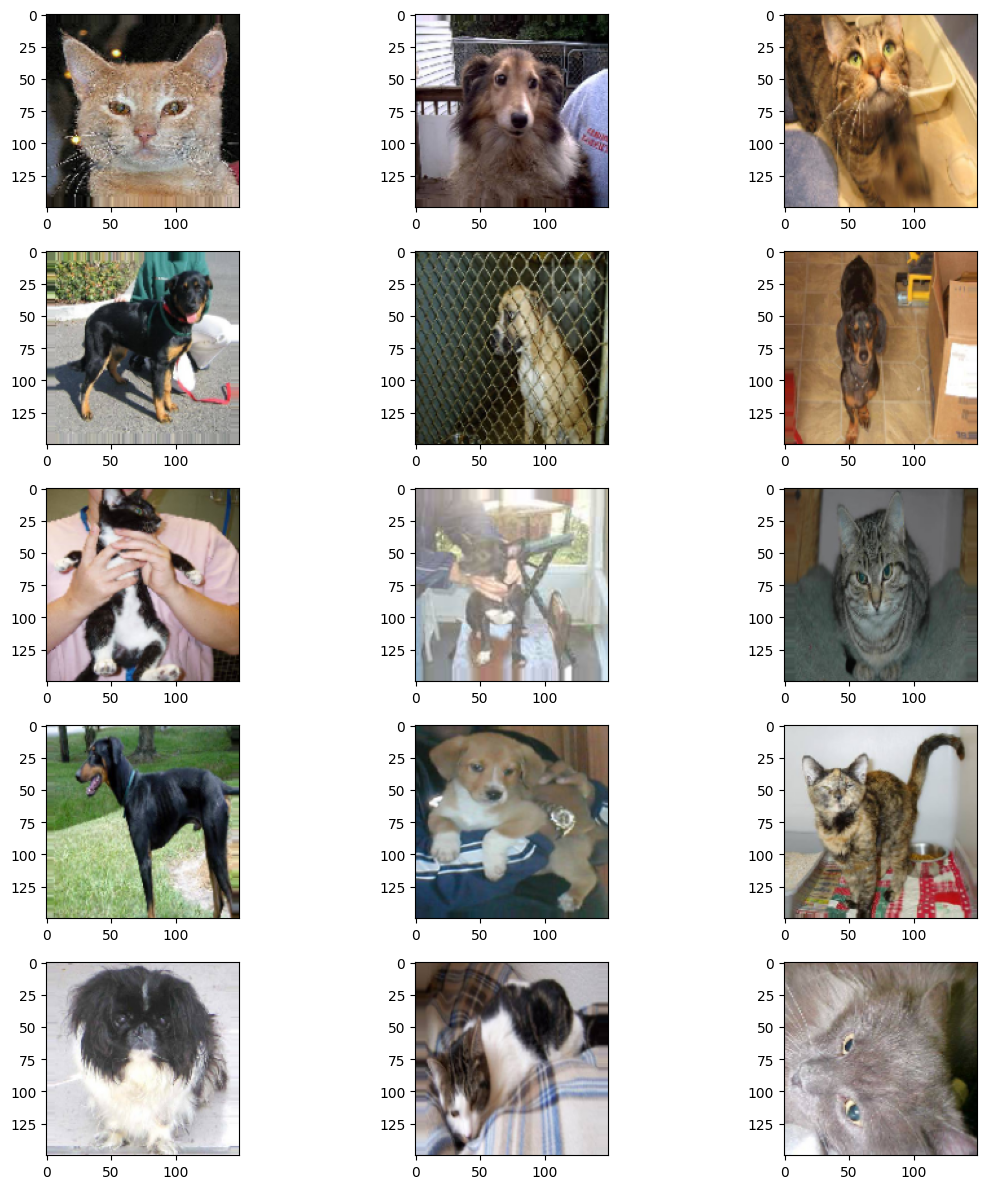

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch,Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()


## by zooming are we blurring the background and highlighting area of interest - cat/dog..
## does zoom does that?

In [ ]:
## loaded the data
## data preprocessing
## split the data to training and testing

## build a model using CNN
## evaluate the model

## predict using a function for a test data

#### Transformers ####

In [ ]:
model = Sequential()
# first block
model.add(Conv2D(32,(3,3),input_shape=input_shape)) # 3x3 filter, 32 filters #288 weights
model.add(Activation('relu')) # 148x148x16
model.add(Conv2D(16,(3,3)))
model.add(Activation('relu')) # 148x148x16
model.add(MaxPooling2D(pool_size=(2,2)))
## second block
model.add(Conv2D(8,(3,3)))
model.add(Activation('relu')) # 148x148x16
model.add(MaxPooling2D(pool_size=(2,2)))
## third block
model.add(Conv2D(4,(3,3)))
model.add(Activation('relu')) # 148x148x16
model.add(MaxPooling2D(pool_size=(2,2)))
## flatten
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1)) # output layer
model.add(Activation('sigmoid')) # 0, 1
model.summary()
### 9x9 image - 3x3 filter - 5 filters -> 7x7x5
## 150x150 image - 3x3 filters - 16 filters - 148x148x16 [without padding]
# what does 16 correspond to number of filters/kernels?
# what does (3,3) correspond to kernel width and height?
## maxpooling works
## 7x7x3 -->    maxpooling (2,2) -->  4x4x3
## 148x148x16 ->maxpooling (2,2) ---> 74x74x16


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      4624      
                                                                 
 activation_1 (Activation)   (None, 146, 146, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 8)         1160      
                                                        

In [ ]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
training = model.fit(train_generator,
                     steps_per_epoch= 80,
                     epochs =20,
                     validation_data = validation_generator
                     )

Epoch 1/20
80/80 [==============================] - 58s 549ms/step - loss: 0.6901 - accuracy: 0.5314 - val_loss: 0.6797 - val_accuracy: 0.5976
Epoch 2/20
80/80 [==============================] - 38s 484ms/step - loss: 0.6800 - accuracy: 0.5742 - val_loss: 0.6834 - val_accuracy: 0.5398
Epoch 3/20
80/80 [==============================] - 38s 474ms/step - loss: 0.6615 - accuracy: 0.6143 - val_loss: 0.6805 - val_accuracy: 0.5947
Epoch 4/20
80/80 [==============================] - 37s 469ms/step - loss: 0.6480 - accuracy: 0.6265 - val_loss: 0.6223 - val_accuracy: 0.6555
Epoch 5/20
80/80 [==============================] - 36s 458ms/step - loss: 0.6161 - accuracy: 0.6602 - val_loss: 0.6175 - val_accuracy: 0.6752
Epoch 6/20
80/80 [==============================] - 35s 443ms/step - loss: 0.6181 - accuracy: 0.6660 - val_loss: 0.6339 - val_accuracy: 0.6525
Epoch 7/20
80/80 [==============================] - 36s 458ms/step - loss: 0.5973 - accuracy: 0.6826 - val_loss: 0.6092 - val_accuracy: 0.6856

Regularization: process to prevent overfitting
Multiple ways to handle overfitting:
1. dropout
2. Batch Normalization
3. early stopping
4. learning rate reduce on pleateau
1. Dropout:
Dropping out some nodes randomly so the model does not learn all the features
How dropout works?
2. Batch Normalization: normalize the hidden layer outputs also
3. early stopping: to stop th4e code early by monitoring validaiton accuracy
4. learning rate reduce on pleateau: learning rate reduce on peaks, so that learning become stable.

In [ ]:
## early stopping
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 4) #wait for 4 epochs, if validation accuracy is not improving further than stop the training

learningrate_reduction = ReduceLROnPlateau(monitor= 'loss',
                                           patience = 4,
                                           factor=0.2,
                                           min_lr = 0.00001)
callbacks = [earlystop,learningrate_reduction]

model1 = Sequential()
# first block
model1.add(Conv2D(32,(3,3),input_shape=input_shape)) # 3x3 filter, 32 filters #288 weights
model1.add(Activation('relu')) # 148x148x16
model1.add(Conv2D(16,(3,3)))
model1.add(Activation('relu')) # 148x148x16
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(16,(3,3)))
model1.add(Activation('relu')) # 148x148x16
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.05))
## third block
model1.add(Conv2D(8,(3,3)))
model1.add(Activation('relu')) # 148x148x16
model1.add(MaxPooling2D(pool_size=(2,2)))
## flatten
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.05))
model1.add(Dense(1)) # output layer
model1.add(Activation('sigmoid')) # 0, 1
model1.summary()
### 9x9 image - 3x3 filter - 5 filters -> 7x7x5
## 150x150 image - 3x3 filters - 16 filters - 148x148x16 [without padding]
# what does 16 correspond to number of filters/kernels?
# what does (3,3) correspond to kernel width and height?
## maxpooling works
## 7x7x3 -->    maxpooling (2,2) -->  4x4x3
## 148x148x16 ->maxpooling (2,2) ---> 74x74x16
## s1: no regularization techniques - validationa accuracy 70% accuracy in 1st epoch
## s2 with regularization techniques - 62% accuracy in 1st epoch [increase/decrease]
## increase epochs
## second block
model1.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

training1 = model1.fit(train_generator,
                     steps_per_epoch= 80,
                     epochs =20,
                     validation_data = validation_generator,
                    callbacks=callbacks
                     )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 146, 146, 16)      4624      
                                                                 
 activation_13 (Activation)  (None, 146, 146, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 16)        2320      
                                                      

In [ ]:
# Overfitting concepts

# if training accuracy is less than validation accuracy : underfitting
# if training accuracy is more than validation accuracy : overfitting
# if training accuracy is around [+1%] validation accuracy : approriate fit
# accuracy: 0.701. val_Accuracy: 0.69

## early stopping
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 4) #wait for 4 epochs, if validation accuracy is not improving further than stop the training

learningrate_reduction = ReduceLROnPlateau(monitor= 'loss',
                                           patience = 4,
                                           factor=0.2,
                                           min_lr = 0.00001)
callbacks = [earlystop,learningrate_reduction]

In [ ]:
# Pretrained models - transfer learning - Huggingface transformers [50 mins] - nlp
# autoencoders - GAN []

In [ ]:
# Difference between NLP an sequential learning?


# NLP - natural language processing [text data]
## NLU - classification - ml- dl- sequence learning